NNAPI is designed to provide a base layer of functionality for higher-level machine learning frameworks, like TensorFlow Lite.    
NNAPI supports inferencing by applying data from Android Devices to previously trained, developer-defined models.    

NNAPI is meant to be called by machine learning libraries, frameworks and tools that let developers train their models off-device and deploy them on Android devices.

<span class="mark">Trade-off</span>:
1. Battery
2. Apk size. If bundling large models in APK would unduly impact your users. You may want to consider downloading the models after app installation, using smaller models, or running your computations in the cloud.

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def imshow(image, w, h):
    plt.figure(figsize=(w,h))
    plt.imshow(mpimg.imread(image))
    plt.axis("off")

# NNAPI runtime

Android's neural networks runtime can efficiently distribute the computeation workload across available on-device processors, including dedicated neural network hardware, GPUs, and DSPs.    


## Architecture

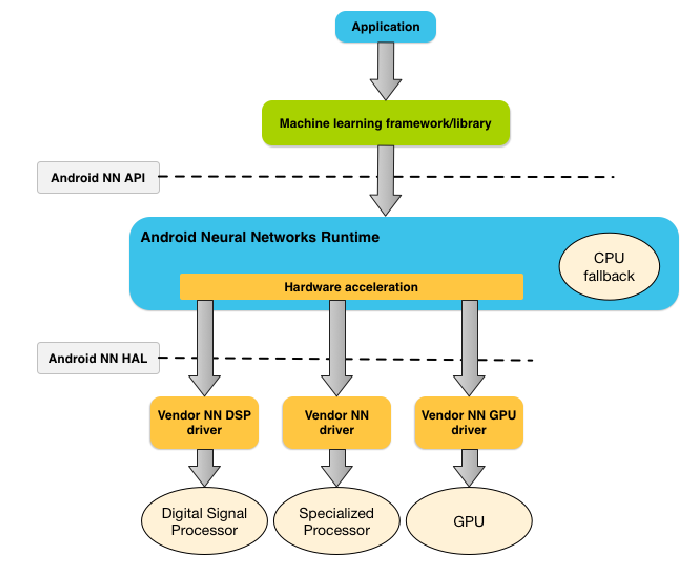

In [30]:
imshow('./nnapi_architecture.png', 20, 10)

# NNAPI programming model

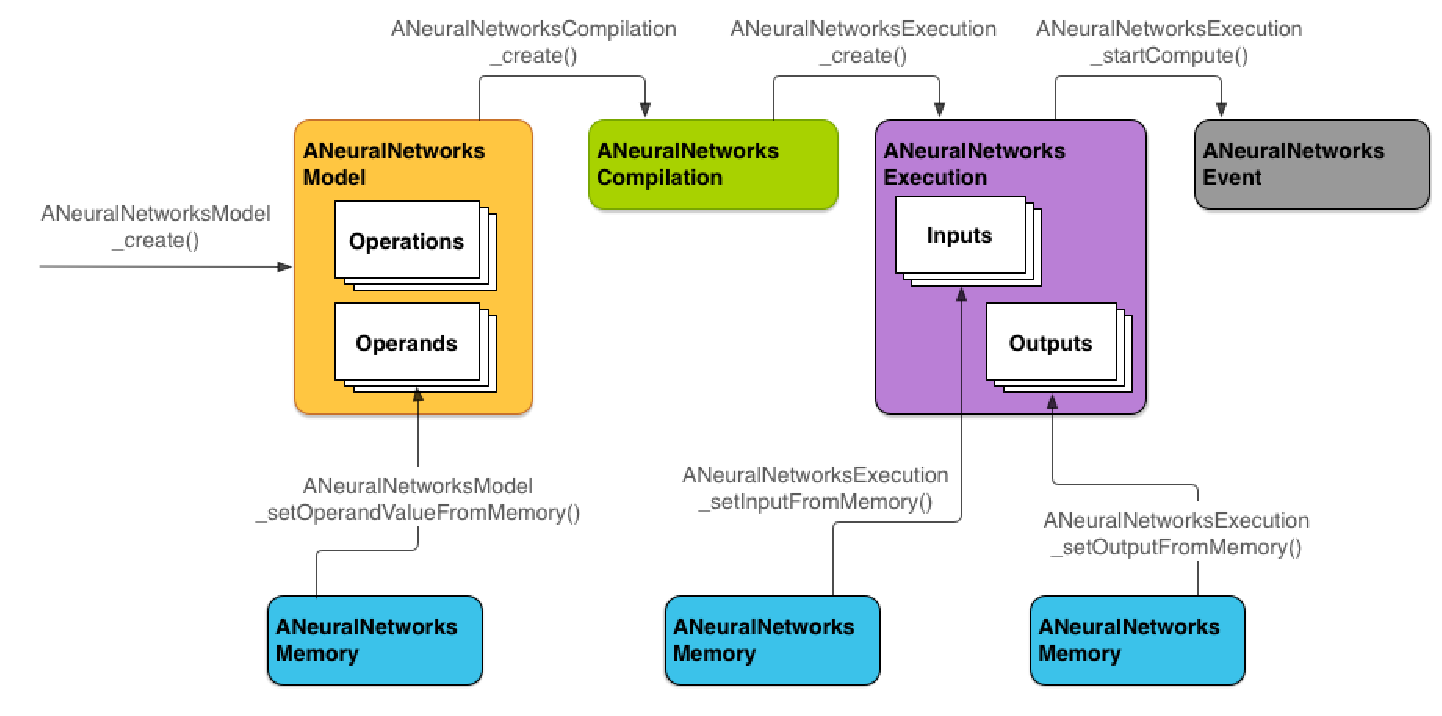

In [33]:
imshow('./nnapi_flow.png', 25, 15)

Computation graph, combined with input data(e.g. weights and biases passed down from a machine learning framework), forms the model for NNAPI runtime evaluation.
NNAPI uses four main abstractions:

- Model    
A computation graph of mathematical operations and constant values learned through a training process.    
They include 2D convolution, logistic activation, Relu and more. In NNAPI, a model is represented as an <span class="mark">ANeuralNetworksModel</span> instance. An sychronous operation.    

- Compilation kɒmpɪˈleɪʃ(ə)n      
Represents a configuration for compiling an NNAPI model into lower-level code. In NNAPI, each compilation is represented as an <span class="mark">ANeuralNetworksCompilation</span> instance. An sychronous operation.
  
- Memory    
An app typically create one shared memeory buffer that contains every tensor needed to define a model.
<span class="mark">ANeuralNetworksMemory</span> instance.

- Execution   
<span class="mark">ANeuralNetworksExecution</span> 
Interface for applying an NNAPI model to a set of inputs and to gather the results. An asynchronous operaton.


Models    
A model is the fundamental unit of computation in NNAPI. Each model is defined by one or more operands and operations.     

Operands    
Operands are data objects used in defining the graph. These include the inputs and outputs of the model, the intermediate nodes that contain the data that flows from one operation to the other, and constants that are passed to these operations.    
scalers and tensors    

Operations    
Element-wise mathematical operations    
Array operations    
Image operations
Convolution operations:CONV_2D...    
Pooling opeations: AVERAGE_POOL_AD, MAX_POOL_2D...    
... 

# NNAPI example
The model consists of three operations: two addition and a multiplication.
```java
tensor0 ---+
           +--- ADD ---> intermediateOutput0 ---+
tensor1 ---+                                    |
                                                +--- MUL---> output
tensor2 ---+                                    |
           +--- ADD ---> intermediateOutput1 ---+
tensor3 ---+
```

Operands    
<span class="mark">tensor0</span> and <span class="mark">tensor2</span> being added are constants, representing the weights that would have been learned 
during a traning process, loaded from model_data.bin.    
<span class="girk">tensor1</span> and <span class="girk">tensor3</span> will be inputs to the model.

Operations    
two ADD operations
MUL operations

model_data.bin    
A binary file of the values of 0.5f(totally 200*2 = 400)     
this emulate the weights in the normal model     
tensor depth is 200, tensor0 uses the first 200 0.5f, tensor2 consumes the second part of the file    
hence: (tensor1+0.5) * (tensor3+0.5)    


## Code
native methods:    
initModel()-->InitModelTask:"model_data.bin"  return modelHandle    
startCompute(modelHanle, input1, input2)-->ComputeTask    
destroyModel(modelHanle)    

At begging, initialize the model and get modelHandle.    
When click the button, triger computation.

## Native Code

nn_sample.cpp    
simple_model.cpp:SimpleModel    

initModel(): create a SimpleModel* nn_model    

SimpleModel    
SimpleModel()    
~SimpleModel()    
CreateCompiledModel()    
Compute()    

### CreateCompiledModel
ANeuralNetworksModel_create    
    ANeuralNetworksModel_addOperand    
    ANeuralNetworksModel_addOperation     
    ANeuralNetworksModel_identifyInputsAndOutputs    
ANeuralNetworksModel_finish    
ANeuralNetworksCompilation_create    
ANeuralNetworksCompilation_finish    

### Compute
ANeuralNetworksExecution *execution;     
ANeuralNetworksExecution_setInput    
ANeuralNetworksExecution_setInputFromMemory    
ANeuralNetworksExecution_startCompute    